# Introduction to Scikit-Learn (sklearn)
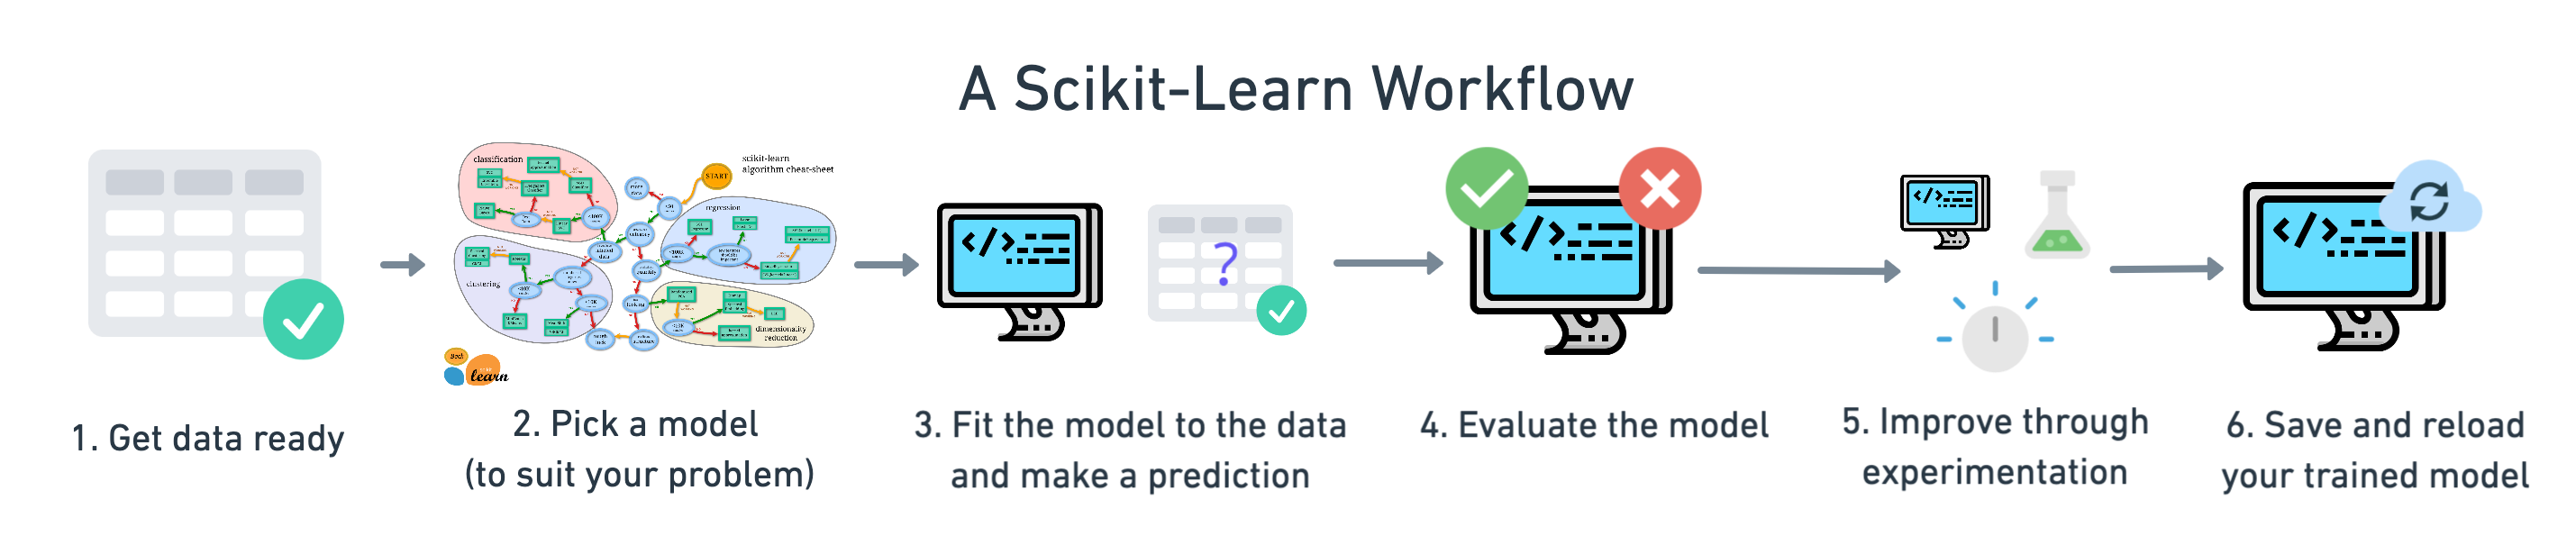
Covered:

0. An end-to-end Scikit-Learn worfklow
1. Getting the data ready
2. Choosing the right maching learning estimator/aglorithm/model for your problem
3. Fitting your chosen machine learning model to data and using it to make a prediction
4. Evaluting a machine learning model
5. Improving predictions through experimentation (hyperparameter tuning)
6. Saving and loading a pretrained model
7. Putting it all together in a pipeline
*Note*: all of the steps in this notebook are focused on supervised learning (having data and labels).

After going through it, you'll have the base knolwedge of Scikit-Learn you need to keep moving forward.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 0. An end-to-end Scikit-Learn Workflow

In [3]:
heart_disease = pd.read_csv("heart-disease.csv")
heart_disease

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
0        0   0     1       1  
1        0   0     2       1  
2        2   0     2       1  
3        2   0     2       1  
4        2   0     2       1  
..     ...  ..   ...     ...  
298      1   0     3       0  
299      1   0     3       0  
300      1   2     3       0  
301      1   1     3       0  
302      1   1     2       0  

[303 rows x 14 columns]

In [4]:
# Create features matrix
X = heart_disease.drop("target", axis=1)

# Create y (labels)
y = heart_disease["target"]

In [5]:
# 2 Choosing the right maching learning estimator/aglorithm/model for your problem and hypermaraters
from sklearn.ensemble import RandomForestClassifier 
# this is just a classification ML model, capable of learning patterns and data

clf = RandomForestClassifier() # Classifier
#Default parametrs
clf.get_params()


{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [6]:
# 3 fit model to train data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [7]:
clf.fit(X_train, y_train); # hey classification model , randomforst, find the patterns in training data

In [8]:
# make a prediction (still step 3)
# y_label = clf.predict(np.array([0, 2, 3, 4]))  dosnt work since the shape isnt correct,
#it should look like the trained data
# so we use X_test

In [9]:
y_preds = clf.predict(X_test)
y_preds

array([1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0], dtype=int64)

In [10]:
y_test

155    1
201    0
61     1
74     1
16     1
      ..
36     1
110    1
120    1
73     1
237    0
Name: target, Length: 61, dtype: int64

In [11]:
# 4. Evaluate the model
clf.score(X_train, y_train) # 1.0 = 100% , since it has learned this data, this shouldnt be the case with test data if it is we 
#we might have done something wrong as no model is 100% accurate

1.0

In [12]:
clf.score(X_test, y_test) # the model has never seen this data

0.7540983606557377

In [13]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(classification_report(y_test, y_preds)) #compares tests vs preds

              precision    recall  f1-score   support

           0       0.73      0.76      0.75        29
           1       0.77      0.75      0.76        32

    accuracy                           0.75        61
   macro avg       0.75      0.75      0.75        61
weighted avg       0.75      0.75      0.75        61



In [14]:
confusion_matrix(y_test, y_preds)

array([[22,  7],
       [ 8, 24]], dtype=int64)

In [15]:
accuracy_score(y_test, y_preds)

0.7540983606557377

In [16]:
# 5. Improve the model
np.random.seed(42)
for i in range(10, 100, 10):
    print(f"Trying model with {i} estimators..")
    clf = RandomForestClassifier(n_estimators=i).fit(X_train, y_train)
    # Seeing if we can improve the model by adjusting one of the H.P
    print(f"Model accuracy on test set: {clf.score(X_test, y_test)*100: .2f}%")
    print(" ")

Trying model with 10 estimators..
Model accuracy on test set:  77.05%
 
Trying model with 20 estimators..
Model accuracy on test set:  73.77%
 
Trying model with 30 estimators..
Model accuracy on test set:  72.13%
 
Trying model with 40 estimators..
Model accuracy on test set:  72.13%
 
Trying model with 50 estimators..
Model accuracy on test set:  73.77%
 
Trying model with 60 estimators..
Model accuracy on test set:  77.05%
 
Trying model with 70 estimators..
Model accuracy on test set:  72.13%
 
Trying model with 80 estimators..
Model accuracy on test set:  77.05%
 
Trying model with 90 estimators..
Model accuracy on test set:  75.41%
 


In [17]:
# It already uses 80 estimators it seems since our accuracy is 88.52..
# 6. Save a model and load it
import pickle 
pickle.dump(clf, open("random_forest_model_1.pkl", "wb"))

In [18]:
loaded_model = pickle.load(open("random_forest_model_1.pkl", "rb"))
loaded_model.score(X_test, y_test) # gives the output of 90 estimators as thats the last value of clf we got from above loop

0.7540983606557377

## 1. Getting the data ready
Data doesn't always come ready to use with a Scikit-Learn machine learning model.

Three of the main steps you'll often have to take are:

1. Splitting the data into features (usually X) and labels (usually y)
2. Filling (also called imputing) or disregarding missing values
3. Converting non-numerical values to numerical values (also call feature encoding)

In [19]:
heart_disease.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

In [20]:
X = heart_disease.drop("target", axis=1)
X

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  
0        0   0     1  
1        0   0     2  
2        2   0     2  
3        2   0     2  
4        2   0     2  
..     ...  ..   ...  
298      1   0     3  
299      1   0     3  
300      1   2     3  
301      1   1     3  
302      1   1     2  

[303 rows x 13 columns]

In [21]:
y = heart_disease["target"]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [22]:
 # Split the data into training and tests set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### 1.1  Make sure its all numerical

In [23]:
car_sales = pd.read_csv("car-sales-extended.csv")
car_sales.head()

Make Colour  Odometer (KM)  Doors  Price
0   Honda  White          35431      4  15323
1     BMW   Blue         192714      5  19943
2   Honda  White          84714      4  28343
3  Toyota  White         154365      4  13434
4  Nissan   Blue         181577      3  14043

In [24]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [25]:
# X and y creation
X = car_sales.drop("Price", axis=1)
X

Make Colour  Odometer (KM)  Doors
0     Honda  White          35431      4
1       BMW   Blue         192714      5
2     Honda  White          84714      4
3    Toyota  White         154365      4
4    Nissan   Blue         181577      3
..      ...    ...            ...    ...
995  Toyota  Black          35820      4
996  Nissan  White         155144      3
997  Nissan   Blue          66604      4
998   Honda  White         215883      4
999  Toyota   Blue         248360      4

[1000 rows x 4 columns]

In [26]:
y = car_sales["Price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [27]:
# # GIVES ERROR
# from sklearn.ensemble import RandomForestRegressor
# # same as classifier but this time we can predict a number, instead of 1 or 0 
# model = RandomForestRegressor()
# model.fit(X_train, y_train)
# model.score(X_test, y_test)

In [28]:
# turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"] # include doors as categories (3 or 4 or 5 doors)
one_hot = OneHotEncoder()
# take the onehot encoder and apply it to the categorical features, and for reamining columns pass through
transformer = ColumnTransformer([("one_hot", one_hot, categorical_features)], remainder="passthrough")
transformed_X = transformer.fit_transform(X)
transformed_X
pd.DataFrame(transformed_X)

0    1    2    3    4    5    6    7    8    9    10   11        12
0    0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0   35431.0
1    1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  192714.0
2    0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0   84714.0
3    0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  154365.0
4    0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  181577.0
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...       ...
995  0.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0   35820.0
996  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  155144.0
997  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0   66604.0
998  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  215883.0
999  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  248360.0

[1000 rows x 13 columns]

In [29]:
# # Lets refit the model 
# np.random.seed(42)
# X_train, X_test, y_train, y_test = train_test_split(transformed_X, y, test_size=0.2)
# model.fit(X_train, y_train);

In [30]:
# model.score(X_test, y_test)

## 1.2 Missing datas
1. we might fill them with some value (imputation)
2. remove the samples with the missing data altogether

In [31]:
car_sales_missing = pd.read_csv("car-sales-extended-missing-data.csv")
car_sales_missing

Make Colour  Odometer (KM)  Doors    Price
0     Honda  White        35431.0    4.0  15323.0
1       BMW   Blue       192714.0    5.0  19943.0
2     Honda  White        84714.0    4.0  28343.0
3    Toyota  White       154365.0    4.0  13434.0
4    Nissan   Blue       181577.0    3.0  14043.0
..      ...    ...            ...    ...      ...
995  Toyota  Black        35820.0    4.0  32042.0
996     NaN  White       155144.0    3.0   5716.0
997  Nissan   Blue        66604.0    4.0  31570.0
998   Honda  White       215883.0    4.0   4001.0
999  Toyota   Blue       248360.0    4.0  12732.0

[1000 rows x 5 columns]

In [32]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [33]:
X = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

In [34]:
# turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"] # include doors as categories (3 or 4 or 5 doors)
one_hot = OneHotEncoder()
# take the onehot encoder and apply it to the categorical features, and for reamining columns pass through
transformer = ColumnTransformer([("one_hot", one_hot, categorical_features)], remainder="passthrough")
transformed_X = transformer.fit_transform(X)
transformed_X
pd.DataFrame(transformed_X)

0
0      (0, 1)\t1.0\n  (0, 9)\t1.0\n  (0, 12)\t1.0\n...
1      (0, 0)\t1.0\n  (0, 6)\t1.0\n  (0, 13)\t1.0\n...
2      (0, 1)\t1.0\n  (0, 9)\t1.0\n  (0, 12)\t1.0\n...
3      (0, 3)\t1.0\n  (0, 9)\t1.0\n  (0, 12)\t1.0\n...
4      (0, 2)\t1.0\n  (0, 6)\t1.0\n  (0, 11)\t1.0\n...
..                                                 ...
995    (0, 3)\t1.0\n  (0, 5)\t1.0\n  (0, 12)\t1.0\n...
996    (0, 4)\t1.0\n  (0, 9)\t1.0\n  (0, 11)\t1.0\n...
997    (0, 2)\t1.0\n  (0, 6)\t1.0\n  (0, 12)\t1.0\n...
998    (0, 1)\t1.0\n  (0, 9)\t1.0\n  (0, 12)\t1.0\n...
999    (0, 3)\t1.0\n  (0, 6)\t1.0\n  (0, 12)\t1.0\n...

[1000 rows x 1 columns]

### Option 1. Fill missing datas with pandas 

In [35]:
car_sales_missing["Make"].fillna("missing", inplace=True)
car_sales_missing["Colour"].fillna("missing", inplace=True)
car_sales_missing["Odometer (KM)"].fillna(car_sales_missing["Odometer (KM)"].mean(), inplace=True)
car_sales_missing["Doors"].fillna(4, inplace=True)

In [36]:
car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [37]:
car_sales_missing.dropna(inplace=True)

In [38]:
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [39]:
len(car_sales_missing)

950

In [40]:
X = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

In [41]:
# turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"] # include doors as categories (3 or 4 or 5 doors)
one_hot = OneHotEncoder()
# take the onehot encoder and apply it to the categorical features, and for reamining columns pass through
transformer = ColumnTransformer([("one_hot", one_hot, categorical_features)], remainder="passthrough")
transformed_X = transformer.fit_transform(car_sales_missing)
transformed_X
pd.DataFrame(transformed_X)


0    1    2    3    4    5    6    7    8    9    10   11   12   13  \
0    0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0   
1    1.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0   
2    0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0   
3    0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0   
4    0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0   
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
945  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0   
946  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0   
947  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0   
948  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0   
949  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0   

           14       15  
0     35431.0  15323.0  
1    192714.0  19943.0  
2     84714.0  28343.0  
3    154365.0  13434.0  
4    181577.0  14043.0  
..        ...      ...  
945   35820.0  32042.0  
946  155144.0   5716.0  
947   66604.0  31570.0  
948  215883.0   4001.0  
949  248360.0  12732.0  

[950 rows x 16 columns]

# Option 2: fill missing values with Scikit-learn

In [42]:
car_sales_missing = pd.read_csv("car-sales-extended-missing-data.csv")
car_sales_missing.head()

Make Colour  Odometer (KM)  Doors    Price
0   Honda  White        35431.0    4.0  15323.0
1     BMW   Blue       192714.0    5.0  19943.0
2   Honda  White        84714.0    4.0  28343.0
3  Toyota  White       154365.0    4.0  13434.0
4  Nissan   Blue       181577.0    3.0  14043.0

In [43]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [44]:
# Drop the rows with no labels
car_sales_missing.dropna(subset=["Price"], inplace=True)
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [45]:
# split into X and y
X = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

# Split data into train and test
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2)

Note: we split data into train and test to perform filling missing values on them seperately

In [46]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Fill categorical values with 'missing' & numerical with mean
cat_imputer = SimpleImputer(strategy="constant", fill_value="missing")
door_imputer = SimpleImputer(strategy="constant", fill_value=4)
num_imputer = SimpleImputer(strategy="mean")

# Define different column features
categorical_features = ["Make", "Colour"]
door_feature = ["Doors"]
numerical_feature = ["Odometer (KM)"]


Note: We use fit_transform() on the training data and transform() on the testing data. In essence, we learn the patterns in the training set and transform it via imputation (fit, then transform). Then we take those same patterns and fill the test set (transform only).

In [47]:
imputer = ColumnTransformer([
    ('cat_imputer', cat_imputer, categorical_features),
    ("door_imputer", door_imputer, door_feature),
    ("num_imputer", num_imputer, numerical_feature)
                            ])

In [48]:
# Fill train and test values separately
filled_X_train = imputer.fit_transform(X_train)
filled_X_test = imputer.transform(X_test)

# Check filled X_train
filled_X_train

array([['Honda', 'White', 4.0, 71934.0],
       ['Toyota', 'Red', 4.0, 162665.0],
       ['Honda', 'White', 4.0, 42844.0],
       ...,
       ['Toyota', 'White', 4.0, 196225.0],
       ['Honda', 'Blue', 4.0, 133117.0],
       ['Honda', 'missing', 4.0, 150582.0]], dtype=object)

In [49]:
car_sales_filled_train = pd.DataFrame(filled_X_train, 
                                columns=["Make", "Colour", "Doors", "Odometer (KM)"] )

In [50]:
car_sales_filled_train.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [51]:
# Get our transformed data array's back into DataFrame's
car_sales_filled_train = pd.DataFrame(filled_X_train, 
                                      columns=["Make", "Colour", "Doors", "Odometer (KM)"])

car_sales_filled_test = pd.DataFrame(filled_X_test, 
                                      columns=["Make", "Colour", "Doors", "Odometer (KM)"])

# Check missing data in training set
car_sales_filled_train.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [52]:
# Now let's one hot encode the features with the same code as before 
categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", 
                                 one_hot, 
                                 categorical_features)],
                                 remainder="passthrough")

# Fill train and test values separately
transformed_X_train = transformer.fit_transform(car_sales_filled_train)
transformed_X_test = transformer.transform(car_sales_filled_test)

# Check transformed and filled X_train
transformed_X_train.toarray()

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 7.19340e+04],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.62665e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 4.28440e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.96225e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.33117e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.50582e+05]])

In [53]:
# Now we've transformed X, let's see if we can fit a model
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()

# Make sure to use transformed (filled and one-hot encoded X data)
model.fit(transformed_X_train, y_train)
model.score(transformed_X_test, y_test)

0.21229043336119102

## 2. Choosing the right estimator/algorithm for your problem

Once you've got your data ready, the next step is to choose an appropriate machine learning algorithm or model to find patterns in your data.

Some things to note:

   * Sklearn refers to machine learning models and algorithms as estimators.
   * Classification problem - predicting a category (heart disease or not).
        * Sometimes you'll see clf (short for classifier) used as a classification estimator instance's variable name.
   * Regression problem - predicting a number (selling price of a car).
   * Unsupervised problem - clustering (grouping unlabelled samples with other similar unlabelled samples).

If you know what kind of problem you're working with, one of the next places you should look at is the Scikit-Learn algorithm cheatsheet.

This cheatsheet gives you a bit of an insight into the algorithm you might want to use for the problem you're working on.
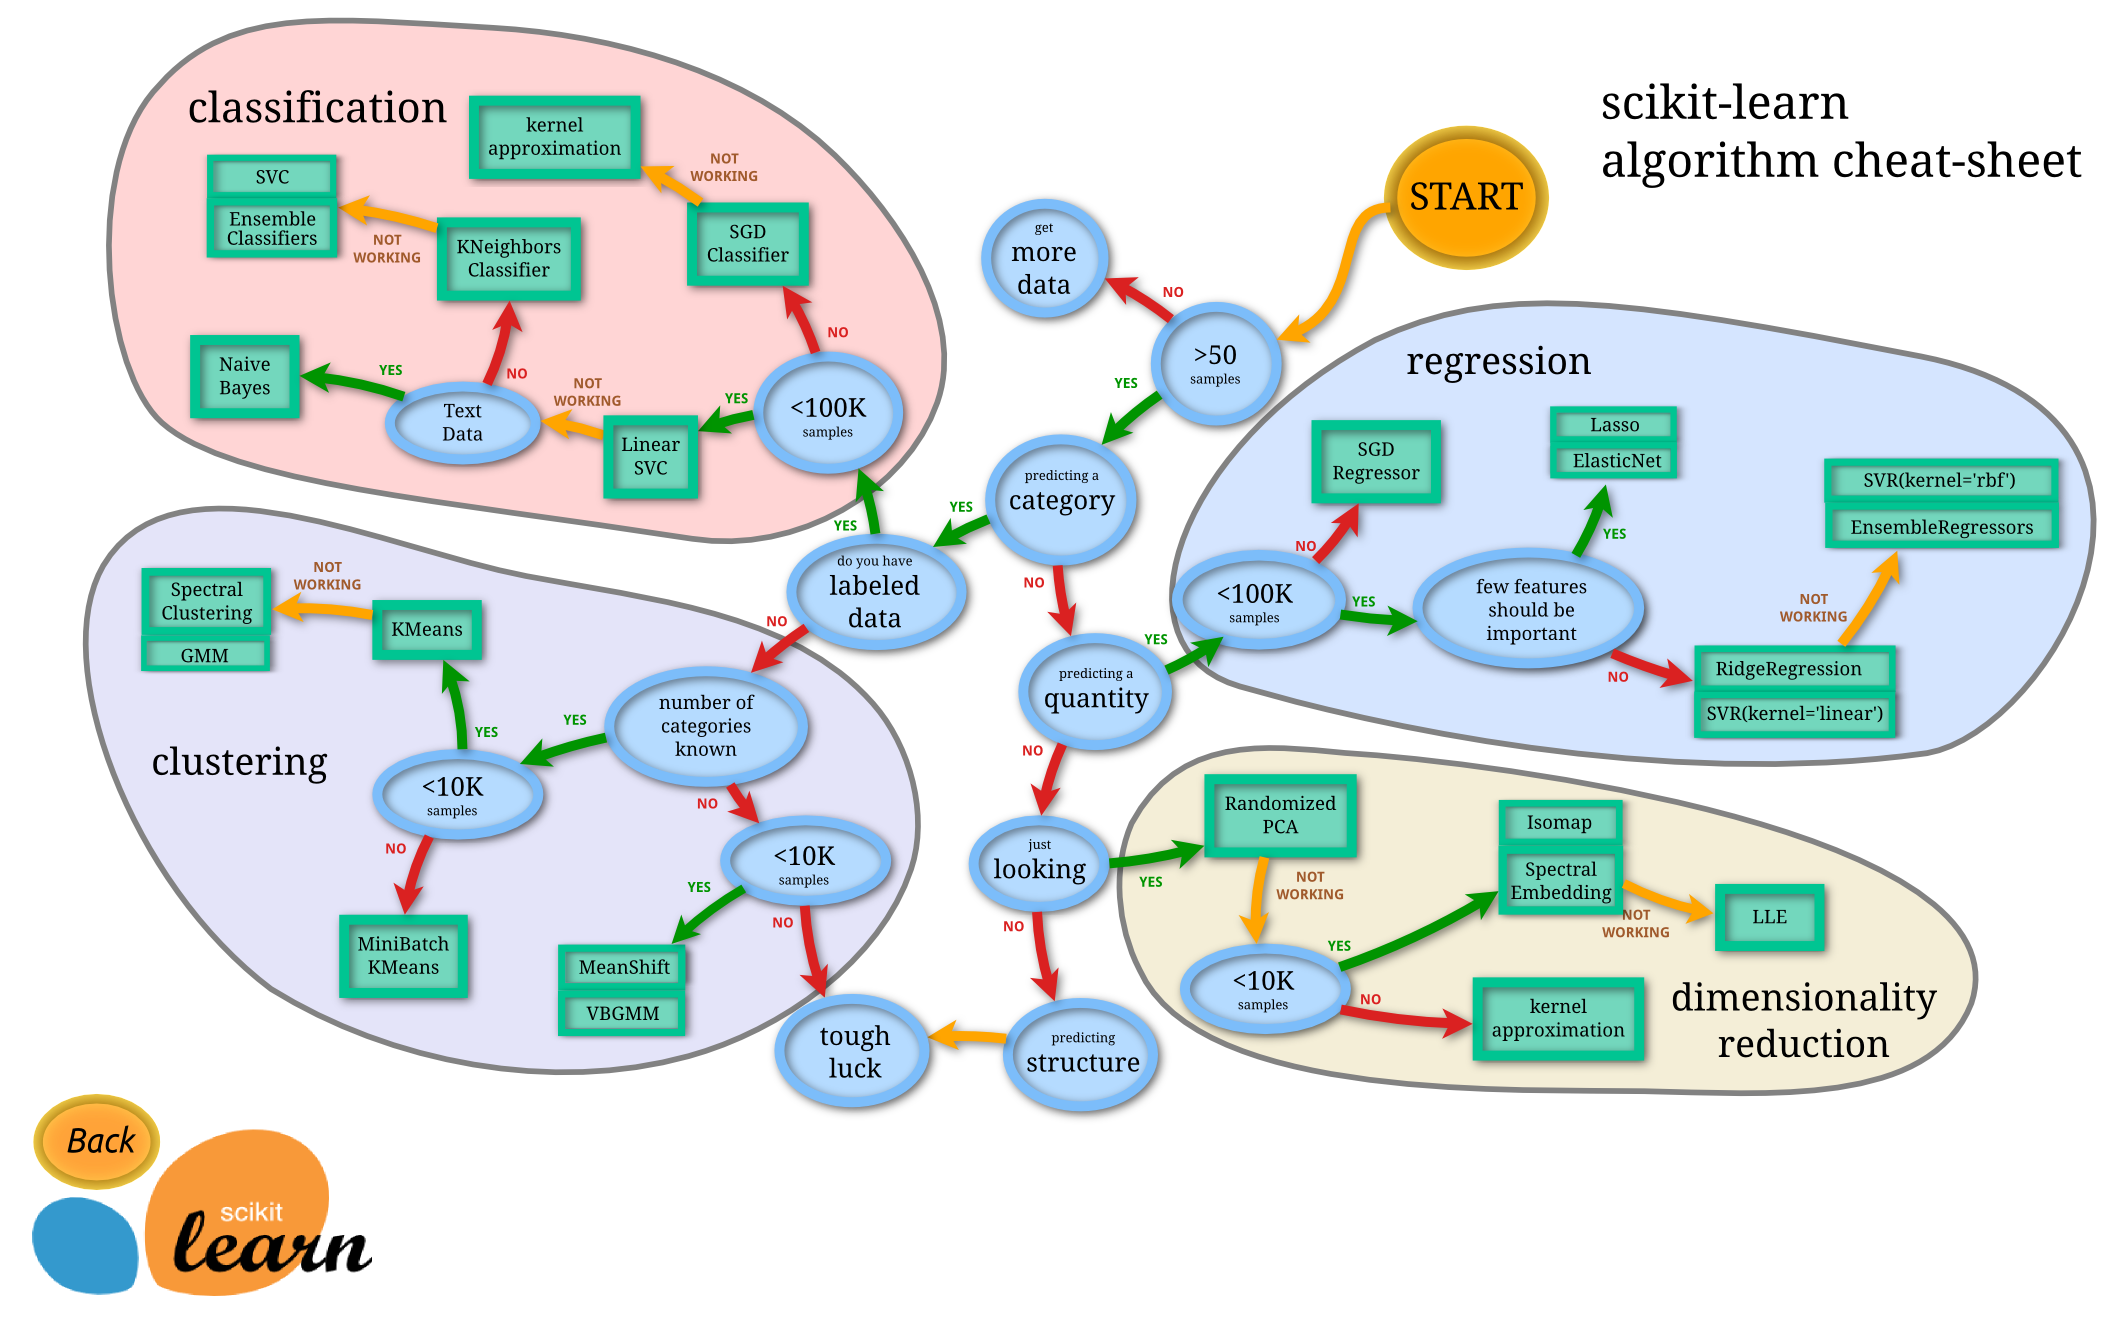
It's important to remember, you don't have to explicitly know what each algorithm is doing on the inside to start using them. If you do start to apply different algorithms but they don't seem to be working, that's when you'd start to look deeper into each one.

Let's check out the cheatsheet and follow it for some of the problems we're working on.

You can see it's split into four main categories. Regression, classification, clustering and dimensionality reduction. Each has their own different purpose but the Scikit-Learn team has designed the library so the workflows for each are relatively similar.

Let's start with a regression problem (trying to predict a number). We'll use the California Housing dataset built into Scikit-Learn's datasets module.

The goal of the California Housing dataset is to predict a given district's median house value (in hundreds of thousands of dollars) on things like the age of the home, the number of rooms, the number of bedrooms, number of people living the home and more.

### 2.1 Picking a machine  learning model for regression problem

Lets use california housing dataset

In [54]:
# Get California housing dataset
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [55]:
housing_df = pd.DataFrame(housing["data"], columns = housing["feature_names"])
housing_df

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  
0        -122.23  
1        -122.22  
2        -122.24  
3        -122.25  
4        -122.25  
...          ...  
20635    -121.09  
20636    -121.21  
20637    -121.22  
20638    -121.32  
20639    -121.24  

[20640 rows x 8 columns]

In [56]:
housing_df["target"] = housing["target"]
housing_df.head()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  target  
0    -122.23   4.526  
1    -122.22   3.585  
2    -122.24   3.521  
3    -122.25   3.413  
4    -122.25   3.422

In [57]:
# housing_df = housing_df.drop("MedHouseVal", axis=1)

In [58]:
housing_df

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  target  
0        -122.23   4.526  
1        -122.22   3.585  
2        -122.24   3.521  
3        -122.25   3.413  
4        -122.25   3.422  
...          ...     ...  
20635    -121.09   0.781  
20636    -121.21   0.771  
20637    -121.22   0.923  
20638    -121.32   0.847  
20639    -121.24   0.894  

[20640 rows x 9 columns]

In [59]:
#Import algorithm / estimator
from sklearn.linear_model import Ridge
#setup random seed
np.random.seed(42)

#Create the data
X = housing_df.drop("target", axis=1)
y = housing_df["target"] # median house price in $ 100k's

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Initiate and fit the model (on the training model)
model = Ridge()
model.fit(X_train, y_train)
model.score(X_test, y_test) # Returns the coefficient of determination, or R^2,
                            # it tells us the dependancy of one variable with another
    # The default score metirc of regression aglorithms is R^2
# So how predictive is the target, given the values (X_train)

0.5758549611440125

Lets use a different model since we are experimenting
we'll use Ensemble method

 from documentation, the goal of this model/method is to combine the predictions of several base estimators built with a given learning algorithm, in order to improve generaliziblity/robustness over a single estimator 
 
 for eg 10 doctors smarter at making decision on a diagonisis vs one doctor



What if RidgeRegression didn't work? Or what if we wanted to improve our results?

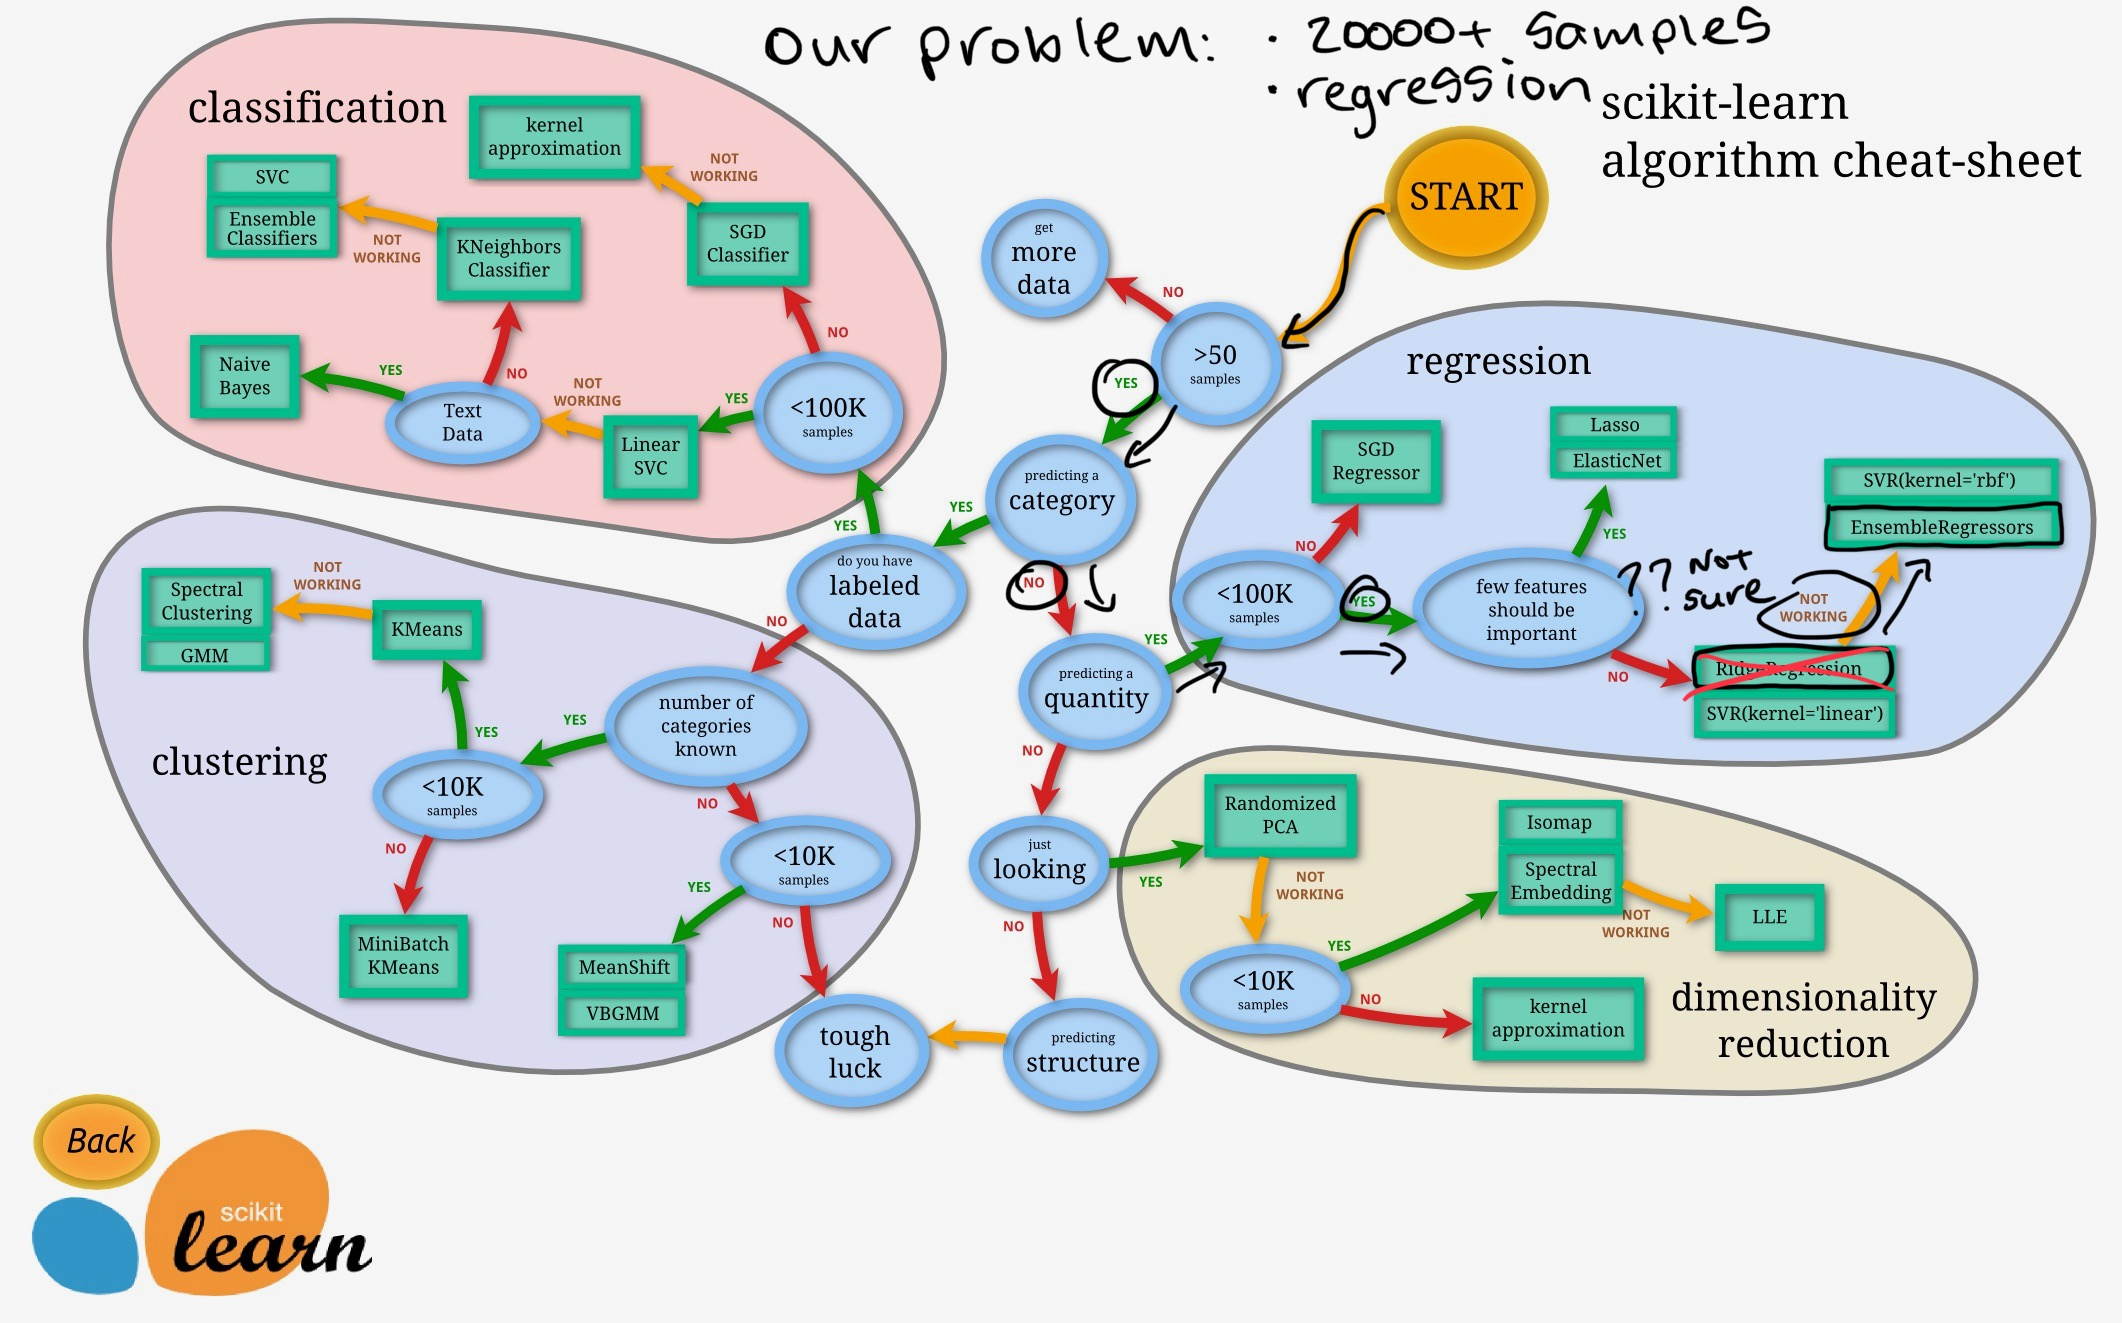

Following the diagram, the next step would be to try EnsembleRegressors. Ensemble is another word for multiple models put together to make a decision.

One of the most common and useful ensemble methods is the Random Forest. Known for its fast training and prediction times and adaptibility to different problems.

The basic premise of the Random Forest is to combine a number of different decision trees, each one random from the other and make a prediction on a sample by averaging the result of each decision tree.

An in-depth discussion of the Random Forest algorithm is beyond the scope of this notebook but if you're interested in learning more, An Implementation and Explanation of the Random Forest in Python by Will Koehrsen is a great read.

Since we're working with regression, we'll use Scikit-Learn's RandomForestRegressor.

We can use the exact same workflow as above. Except for changing the model.


In [60]:
# Import the RandomForestRegressor model class from the ensemble module
from sklearn.ensemble import RandomForestRegressor

# Setup random seed
np.random.seed(42)

# Create the data
X = housing_df.drop("target", axis=1)
y = housing_df["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Institate and fit the model (on the training set)
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Check the score of the model (on the test set)
# The default score metirc of regression aglorithms is R^2
model.score(X_test, y_test)

0.8065734772187598

## 2.2 Choosing an estimator for a classification problem 
The map ... https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html




In [61]:
heart_disease.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

In [62]:
# Consulting the map, trying linear SVC
# Import LinearSVC from the svm module
from sklearn.svm import LinearSVC

# Setup random seed
np.random.seed(42)

# Split the data into X (features/data) and y (target/labels)
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate and fit the model (on the training set)
clf = LinearSVC(max_iter=1000)
clf.fit(X_train, y_train)

# Check the score of the model (on the test set)
clf.score(X_test, y_test)

C:\Users\Bassam Adnan\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.8688524590163934

The above warning occurs since target only has 2 values possible (either 1 or 0 so it is basically coinflip)  
so we use the map (skip  k neighbors) and go for ensemble classifier (while recording the lecture the above score was less)

Lets try another estimator

In [63]:
# Import the RandomForestClassifier model class from the ensemble module
from sklearn.ensemble import RandomForestClassifier

# Setup random seed
np.random.seed(42)

# Split the data into X (features/data) and y (target/labels)
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate and fit the model (on the training set)
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Check the score of the model (on the test set)
clf.score(X_test, y_test)

0.8524590163934426

## 3. Fit the model to data and using it to make predictions

Now you've chosen a model, the next step is to have it learn from the data so it can be used for predictions in the future.

If you've followed through, you've seen a few examples of this already.

## 3.1 Fitting a model to data

In Scikit-Learn, the process of having a machine learning model learn patterns from a dataset involves calling the fit() method and passing it data, such as, fit(`X`, `y`).

Where `X` is a feature array and y is a target array.

Other names for `X` include:

   * Data
   * Feature variables
   * Features

Other names for `y` include:

   * Labels
   * Target variable

For supervised learning there is usually an `X` and `y`. For unsupervised learning, there's no `y` (no labels).

Let's revisit the example of using patient data (`X`) to predict whether or not they have heart disease (`y`).

In [64]:


# Import the RandomForestClassifier model class from the ensemble module
from sklearn.ensemble import RandomForestClassifier

# Setup random seed
np.random.seed(42)

# Split the data into X (features/data) and y (target/labels)
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate the model (on the training set)
clf = RandomForestClassifier()

# Call the fit method on the model and pass it training data
clf.fit(X_train, y_train)

# Check the score of the model (on the test set)
clf.score(X_test, y_test)
# This is evaluating the model on the test dataset, so the score is making predictions on X_test data and comparing them to
# y_test


0.8524590163934426

In [65]:
X.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  
0   0     1  
1   0     2  
2   0     2  
3   0     2  
4   0     2

In [66]:
y.tail()

298    0
299    0
300    0
301    0
302    0
Name: target, dtype: int64

## 3.2 Make predictions using a machine learning model
2 ways to make predict function:
1. `predict()` (main)
2. `predict_proba()`

In [67]:
clf.predict(X_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [68]:
np.array(y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [69]:
# compare predictions to truth labels to evaluate the mode, y is also called the "grand truth"
y_preds = clf.predict(X_test)
np.mean(y_preds == y_test)

0.8524590163934426

In [70]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_preds)

0.8524590163934426

Make predictions with `predict_proba`

In [71]:
# predict proba returns probabilities of a classification label
clf.predict_proba(X_test[:5])

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

In [72]:
# Predict on same data
clf.predict(X_test[:5])

array([0, 1, 1, 0, 1], dtype=int64)

`predict()` can also be used for regression models

In [73]:
housing_df.head()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  target  
0    -122.23   4.526  
1    -122.22   3.585  
2    -122.24   3.521  
3    -122.25   3.413  
4    -122.25   3.422

In [74]:
# Import the RandomForestRegressor model class from the ensemble module
from sklearn.ensemble import RandomForestRegressor

# Setup random seed
np.random.seed(42)

# Create the data
X = housing_df.drop("target", axis=1)
y = housing_df["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Institate and fit the model (on the training set)
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Make predictions
y_preds = model.predict(X_test)

In [75]:
y_preds[:10]

array([0.49384  , 0.75494  , 4.9285964, 2.54316  , 2.33176  , 1.6525301,
       2.34323  , 1.66182  , 2.47489  , 4.8344779])

In [76]:
np.array(y_test[:10])

array([0.477  , 0.458  , 5.00001, 2.186  , 2.78   , 1.587  , 1.982  ,
       1.575  , 3.4    , 4.466  ])

# 4. Evaluate the model 
Three ways to evaluate the scikit learn  models/estimators:
1. Estimators built in `score()` method 
2. The `scoring` parameter
3. Problem-specefic metric functions

## 4.1 Evaluating a model with `score()` method

In [77]:
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)

# Create X and y
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create an instance of classifier
clf = RandomForestClassifier(n_estimators=100)

 # Fit data
clf.fit(X_train, y_train)

# Evaluate the Random Forest Classifier using score
clf.score(X_test, y_test)

0.8524590163934426

Using `score()` on  a regression dataset

In [78]:
# Import the RandomForestRegressor model class from the ensemble module
from sklearn.ensemble import RandomForestRegressor

# Setup random seed
np.random.seed(42)

# Create the data
X = housing_df.drop("target", axis=1)
y = housing_df["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Institate and fit the model (on the training set)
model = RandomForestRegressor()
model.fit(X_train, y_train);

In [79]:
model.score(X_test, y_test)

0.8065734772187598

In [80]:
# Note this is not the score as in results, this is R^2 since we are using RandomForest Regressor, this returns R^2 metric
# This implies that if it was 1.0 => perfectly predicted test values
# If it predicted the mean of the test values we would get 0.0, this is how R^2 works
y_test.mean()

2.0550030959302275

In [81]:
# if every single sample in our prediction predicted this value, we would get score of 0

##  4.2 Evaluating a model using `scoring` parameter

In [82]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)

# Create X and y
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create an instance of classifier
clf = RandomForestClassifier(n_estimators=100)

 # Fit data
clf.fit(X_train, y_train)

# Evaluate the Random Forest Classifier using score
clf.score(X_test, y_test)


0.8524590163934426

In [83]:
# np.random.seed(42)
cross_val_score(clf, X, y, cv=5) # 5 by default

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

In [84]:
np.random.seed(42)

# single training test and split score 
clf_single_score = clf.score(X_test, y_test)

# Mean of 5-fold cross validation score
clf_cross_val_score = np.mean(cross_val_score(clf, X, y))

# compare
clf_single_score, clf_cross_val_score

(0.8524590163934426, 0.8248087431693989)

In [85]:
# Scoring param is set to None by default  can be seen by pressing shift tab
cross_val_score(clf, X, y, cv=5, scoring=None)
# by default , i.e scoing = none, then estimators default scorer is used

array([0.78688525, 0.86885246, 0.80327869, 0.78333333, 0.76666667])

In [86]:
# Default scoring parameter  of classifier = mean accuracy
# clf.score()

### 4.2.1 Classification model evaluation metrics

1. Accuracy
2. Area under ROC curve
3. Confusion matrix
4. Classification report

**Accuracy**

In [87]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

clf = RandomForestClassifier()
# clf = RandomForestClassifier
cross_val_score = cross_val_score(clf, X, y, cv=5)

In [88]:
np.mean(cross_val_score)

0.8248087431693989

**Area under the reciever opearting characterestic curve (AUC/ROC)**

ROC curves are a comparasion of models True positive rate (TPR) or FPR 
* True positive = model predicts 1 when truth is 1
* False positive = model predicts 1 when truth is 0
* True negative = model predicts  0 when truth is 0
* False negative = model predicts 0 when truth is 1
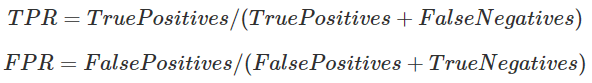

In [89]:
from sklearn.metrics import roc_curve
clf.fit(X_train, y_train)

# Make predictions with probabilities 
y_probs = clf.predict_proba(X_test)
y_probs[:10]

array([[0.87, 0.13],
       [0.41, 0.59],
       [0.45, 0.55],
       [0.89, 0.11],
       [0.19, 0.81],
       [0.14, 0.86],
       [0.4 , 0.6 ],
       [0.96, 0.04],
       [1.  , 0.  ],
       [0.43, 0.57]])

In [90]:
y_probs_positive = y_probs[:, 1]
y_probs_positive[:10]

array([0.13, 0.59, 0.55, 0.11, 0.81, 0.86, 0.6 , 0.04, 0.  , 0.57])

In [91]:
# calculate fpr tpr and thresh holds
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)

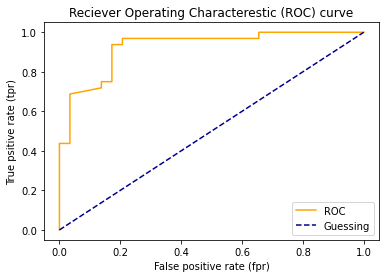

In [92]:
# create a function for plotting ROC curves
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    """
    Plots a roc curve given the  fpr and tpr of a model 
    """
    plt.plot(fpr, tpr, color="orange", label="ROC")
    # plot line with no predictive power (baseline)
    plt.plot([0, 1], [0,1], color="darkblue",linestyle="--", label="Guessing")
    plt.xlabel("False positive rate (fpr)")
    plt.ylabel("True psitive rate (tpr)")
    plt.title("Reciever Operating Characterestic (ROC) curve")
    plt.legend()
    plt.show()

plot_roc_curve(fpr, tpr)

In [93]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_probs_positive)

0.9251077586206896

**Confusion Matrix**

A confusion matrix is a quick way to compare  the labels a model predicts and the actual labels it was supposed to predict. In essence giving us the idea where the model was getting confused

In [94]:
from sklearn.metrics import confusion_matrix
y_preds = clf.predict(X_test)
confusion_matrix(y_test, y_preds)


array([[24,  5],
       [ 4, 28]], dtype=int64)

In [95]:
# Visualize confusion matrix with pd.crosstab()
pd.crosstab(y_test, 
            y_preds, 
            rownames=["Actual labels"],
           colnames=["Predicted labels"])

Predicted labels   0   1
Actual labels           
0                 24   5
1                  4  28

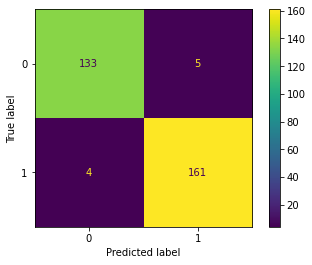

In [96]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(estimator=clf, X=X, y=y); # Pass entire data
#alternatively we could use seaborn heatmap function

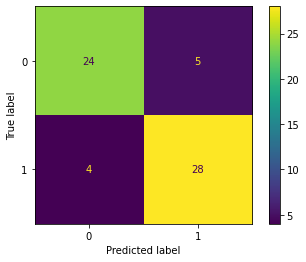

In [97]:
# Plot confusion matrix from predictions
ConfusionMatrixDisplay.from_predictions(y_true=y_test, 
                                        y_pred=y_preds);

**Classification Report**

In [98]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_preds))
#Check ML intro to sci kit for explaination

              precision    recall  f1-score   support

           0       0.86      0.83      0.84        29
           1       0.85      0.88      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



In [99]:
# We dont check accuracy only as its not the ONLY criteria, for eg if we have 10000 models  and only one of the 10k had 
# positive value for heart disease, our model would predict every case as 0 
# Where precision and recall become valuable
disease_true = np.zeros(10000)
disease_true[0] = 1 # only one case

disease_preds = np.zeros(10000) # every prediction is 0

pd.DataFrame(classification_report(disease_true, 
                                   disease_preds, 
                                   output_dict=True,
                                   zero_division=0))

0.0  1.0  accuracy     macro avg  weighted avg
precision     0.99990  0.0    0.9999      0.499950       0.99980
recall        1.00000  0.0    0.9999      0.500000       0.99990
f1-score      0.99995  0.0    0.9999      0.499975       0.99985
support    9999.00000  1.0    0.9999  10000.000000   10000.00000

In [100]:
# although the model achieves 99.99% accurate is the model useful? 
# Thats why we use at macro avg, on precision its getting 0 for class 1 (it didnt even predict class 1)
# we can learn for more , this is bare minimum, go to modules/model_evaluation in scikit

### 4.2.2 Regression model evaluation metrics
https://scikit-learn.org/stable/modules/model_evaluation.html
covered: 
1. R^2
2. Mean absolute error (MAE)
3. Mean Square error (MSE)

In [107]:
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)
X = housing_df.drop("target", axis=1)
y = housing_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model = RandomForestRegressor()
model.fit(X_train, y_train);


In [109]:
model.score(X_test, y_test)
# This score may go upto -inf

0.8065734772187598

In [110]:
y_test

20046    0.47700
3024     0.45800
15663    5.00001
20484    2.18600
9814     2.78000
          ...   
15362    2.63300
16623    2.66800
18086    5.00001
2144     0.72300
3665     1.51500
Name: target, Length: 4128, dtype: float64

In [111]:
y_test.mean()

2.0550030959302275

In [112]:
# if our model just predicted the above mean, we would get the R^2 score  = 0.00, if it predicted y test perfectly => =1

In [113]:
from sklearn.metrics import r2_score

# Fill an array with the y_test mean
y_test_mean = np.full(len(y_test), y_test.mean())
y_test_mean[:10]

array([2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031,
       2.0550031, 2.0550031, 2.0550031, 2.0550031])

In [117]:
r2_score(y_test,
         y_test_mean)
# Simplest model would predict all the targets as the avg of test cases

0.0

In [118]:
r2_score(y_test, y_test)

1.0

***Mean absolute error (MAE)***

MAE is the average of the absolute differences between predictions and actual values. 

It gives an idea of how wrong your models predictions are 

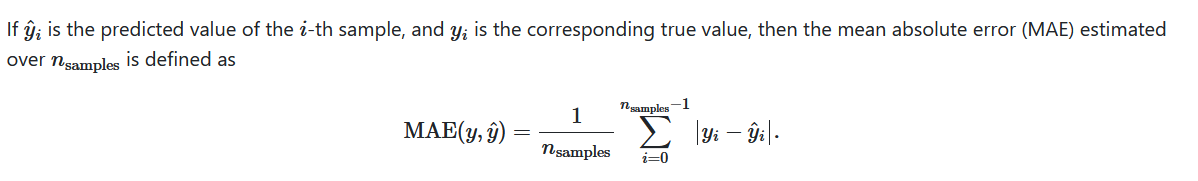

In [120]:
from sklearn.metrics import mean_absolute_error

y_preds = model.predict(X_test)
mae = mean_absolute_error(y_test, y_preds)
mae

0.32659871732073664

In [121]:
# Create a df which has columns of y_test, y_preds, and their differences, taking their abs mean, i.e 
# np.abs(df["differences"]).mean() would give the same value as above 
# Do remember this difference mean is in the scale of 100k's in reality

***Mean Square Error (MSE)***
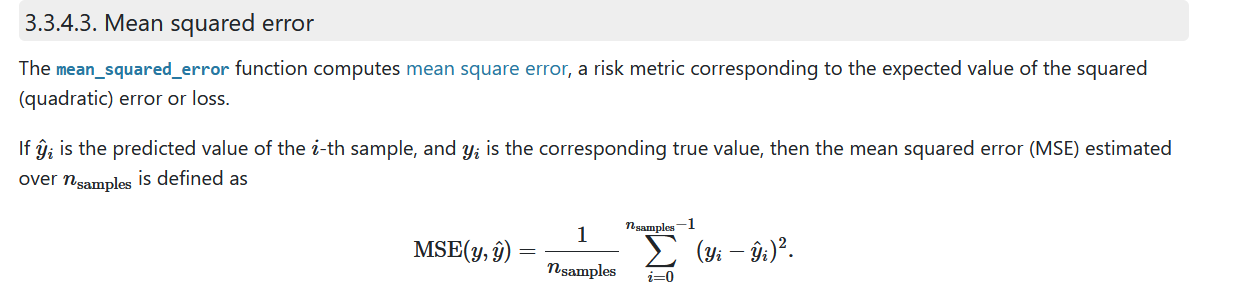

In [122]:
from sklearn.metrics import mean_squared_error

y_preds = model.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
mse

0.2534678520824551

In [125]:
df = pd.DataFrame(data = {"actual prices": y_test,
                         "predicted prices":y_preds},
                 )
df["differences"] = df["predicted prices"] - df["actual prices"]
df.head()

actual prices  predicted prices  differences
20046        0.47700          0.493840     0.016840
3024         0.45800          0.754940     0.296940
15663        5.00001          4.928596    -0.071414
20484        2.18600          2.543160     0.357160
9814         2.78000          2.331760    -0.448240

In [126]:
np.abs(df.differences).mean()

0.32659871732073803

In [144]:
np.square(df.differences).mean()
# Because of how mse is calculated it amplifies the error

0.25346785208245565

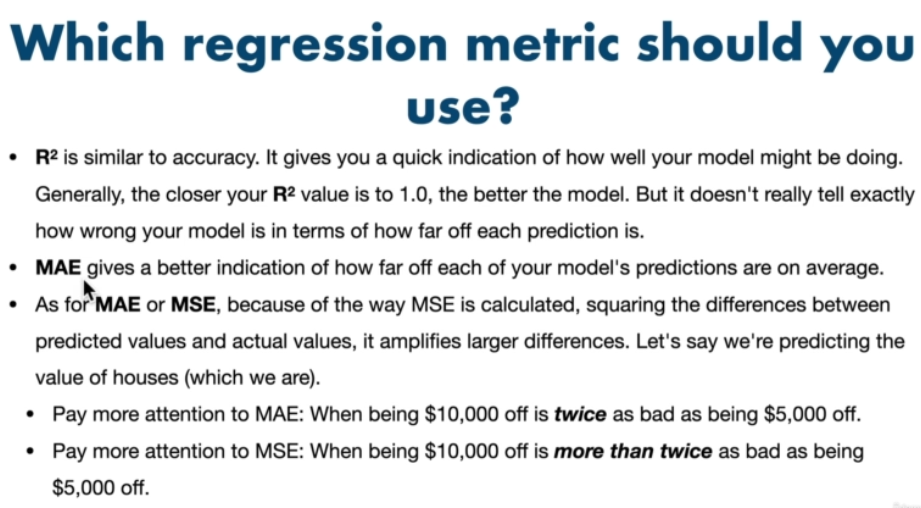

## 4.2.3 Using `score` method

In [145]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)
X = housing_df.drop("target", axis=1)
y = housing_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model = RandomForestRegressor()
# model.fit(X_train, y_train);
cv_r2 = cross_val_score(model, X, y, cv=3, scoring=None)

In [148]:
np.mean(cv_r2)

0.6551313979351616

In [150]:
# Using MAE for scoring 
cv_mse = cross_val_score(model, X, y, cv=3, scoring="neg_mean_squared_error")
np.mean(cv_mse)

-0.46337771282523166

In [152]:
cv_mae = cross_val_score(model, X, y, cv=3, scoring="neg_mean_absolute_error")
np.mean(cv_mae)

-0.48133707394379854

## 4.3 Using different evaluation metrics as Scikit-Learn functions
 revision, using scklearn.metrics module

### Classifiers

In [153]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)

# Make predictions
y_preds = clf.predict(X_test)

# Evaluate the classifier
print("Classifier metrics on the test set:")
print(f"Accuracy: {accuracy_score(y_test, y_preds) * 100:.2f}%")
print(f"Precision: {precision_score(y_test, y_preds):.2f}")
print(f"Recall: {recall_score(y_test, y_preds):.2f}")
print(f"F1: {f1_score(y_test, y_preds):.2f}")

Classifier metrics on the test set:
Accuracy: 85.25%
Precision: 0.85
Recall: 0.88
F1: 0.86


### Regression

In [154]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

np.random.seed(42)

X = housing_df.drop("target", axis=1)
y = housing_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2)

model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, y_train)

# Make predictions
y_preds = model.predict(X_test)

# Evaluate the model
print("Regression model metrics on the test set:")
print(f"R^2: {r2_score(y_test, y_preds):.2f}")
print(f"MAE: {mean_absolute_error(y_test, y_preds):.2f}")
print(f"MSE: {mean_squared_error(y_test, y_preds):.2f}")

Regression model metrics on the test set:
R^2: 0.81
MAE: 0.33
MSE: 0.25


# 5. Improving Model

First predictions = baseline predictions.

First models = baseline models.

From data presp:
* Could we collect more data? (more = better)
* Could we improve our data?

From a model persp:
* Is there a better model we could use?
* Could we improve the current model? 

Hyperparameters vs Parameters:
* Parameters = model finds these patterns in data 
* Hyperparameters = settings on a model you can adjust to (potentially) improve its ability to find patterns

Three ways to adjust hyperparameters:
1. By hand
2. Randomly with RandomSearchCV
3. Exhaustively with GridSearchCV

In [155]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### 5.1 Tuning parameters by Hand
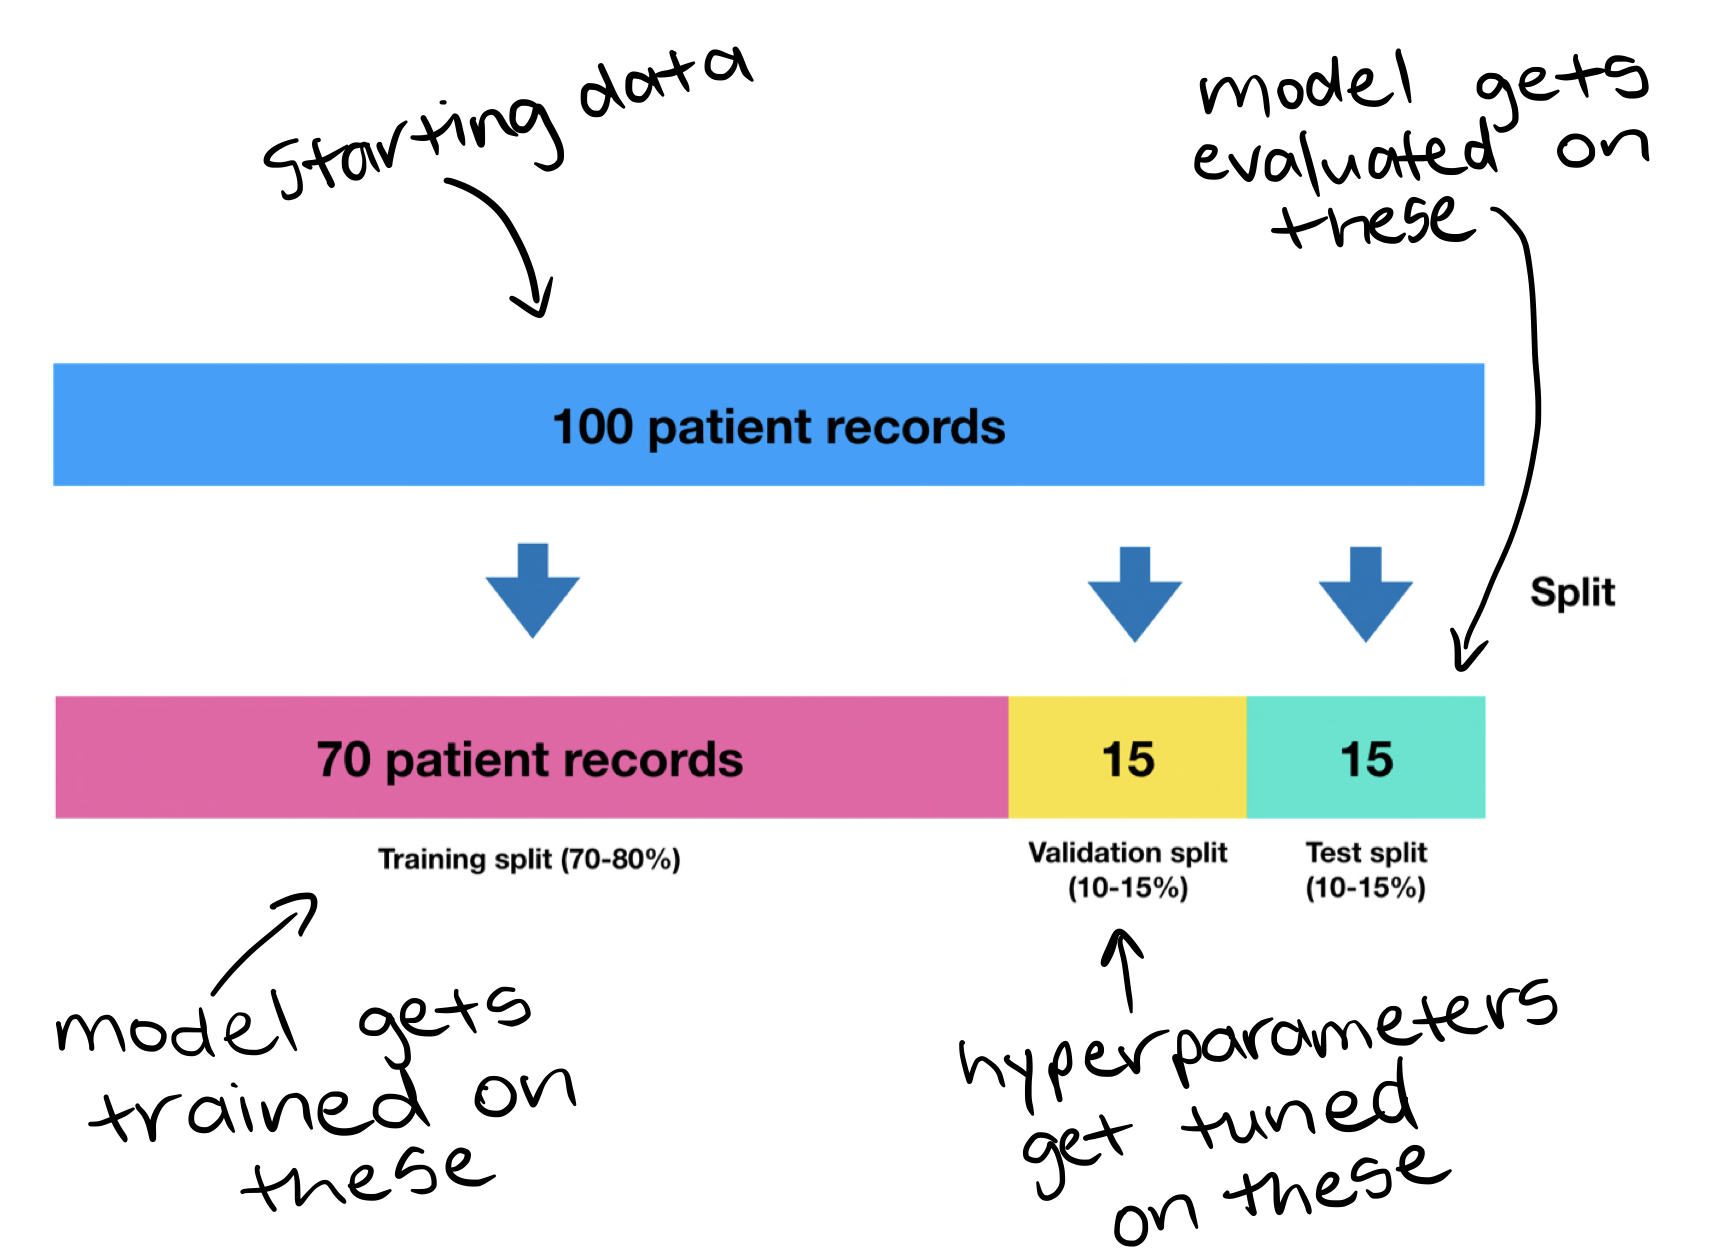

In [ ]:
# Kind of like giving a mock test (validation split) before actual test (test split)

In [156]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

Covered: 
* `max_depth`
* `max_features`
* `min_samples_leaf`
* `min_samples_split`
* `n_estimators`

In [162]:
def evaluate_preds(y_true, y_preds):
    """
    Performs evaluation comparision on y_true labels vs y_pred labels, *on classification*
    """
    accuracy =  accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    metric_dict = {"accuracy": round(accuracy, 2),
                "precision": round(precision, 2),
                  "recall": round(precision, 2),
                  "f1": round(f1, 2)}
    print(f"Acc: {accuracy * 100:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 score: {f1:.2f}")

    return metric_dict

In [163]:
# train_test_split dosnt split it into validation set , so we manually do it
np.random.seed(42)

# shuffle

heart_disease_shuffeled = heart_disease.sample(frac=1)
X = heart_disease_shuffeled.drop("target", axis=1)
y = heart_disease_shuffeled["target"]

# Split data into train, validation, and test sets
train_split = round(0.7 * len(heart_disease_shuffeled)) # 70% of data
valid_split = round(train_split + 0.15*len(heart_disease_shuffeled)) # 15% of data
X_train, y_train = X[:train_split], y[:train_split]
X_valid, y_valid = X[train_split:valid_split], y[train_split:valid_split]
X_test, y_test = X[valid_split:], y[valid_split:]

clf = RandomForestClassifier()
# Train on Training split

clf.fit(X_train, y_train)

# Make baseline predictions, we first check results on validation set, hypertune the params, and then perform it again 
# on validation set
y_preds = clf.predict(X_valid)

# Evaluate the classifier  on validaiton set
baseline_metrics = evaluate_preds(y_valid, y_preds)
baseline_metrics

Acc: 82.22%
Precision: 0.81
Recall: 0.88
F1 score: 0.85


{'accuracy': 0.82, 'precision': 0.81, 'recall': 0.81, 'f1': 0.85}

In [ ]:
# # ALTER FOR ABOVE
#     from sklearn.ensemble import RandomForestClassifier
     
#     np.random.seed(42)
     
#     X = heart_dx.drop('target', axis = 1)
#     y = heart_dx['target']
     
#     # I first split the data into training and test/validation set. Test_size at 0.3 to obtain 70% as training data
     
#     X_train, X_val_test, y_train, y_val_test = train_test_split(X, y, test_size = 0.3)
     
#     # Then I split the val_test(validation/data set) into two using test_size of 0.5 to obtain 15% for each
     
#     X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size = 0.5)
     
#     len(X_train), len(X_val), len(X_test)

In [164]:
# Create  a second classifier with different hyper parameters
np.random.seed(42)

clf_2 = RandomForestClassifier(n_estimators = 500)
clf_2.fit(X_train, y_train)

# Make predictions with diff hyper parameters on same data
y_preds_2 = clf_2.predict(X_valid)

# Evaluate the second classifier
clf_2_metrics = evaluate_preds(y_valid, y_preds_2)

Acc: 82.22%
Precision: 0.81
Recall: 0.88
F1 score: 0.85


In [165]:
# clf_3 = RandomForestClassifier(n_estimators=100,
#                               max_depth=10)
# Tuning model by hand seems like alot of work, so we are going to use randomised search cross validation (RSCV)

### 5.2 Hyperparameter tuning with RandomizedSearchCV

In [166]:
from sklearn.model_selection import RandomizedSearchCV

# A dictionary of H.V we would like to adjust
grid = {"n_estimators": [10, 100, 200, 500, 1000, 1200], 
       "max_depth": [None, 5, 10, 20, 30],
       "max_features": ["auto", "sqrt"],
       "min_samples_split": [2, 4, 6],
       "min_samples_leaf": [1, 2, 4]}

np.random.seed(42)

# Split into X and y
X = heart_disease_shuffeled.drop("target", axis=1)
y = heart_disease_shuffeled["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier(n_jobs=1) # n_jobs = how much proccessor do you want to dedicate towards your model? -1 = max

# Setup RSCV
rs_clf = RandomizedSearchCV(estimator=clf, 
                           param_distributions=grid, 
                           n_iter=10, # no of models to try
                           cv=5, 
                           verbose=2)
# Fit the RSCV version of clf
rs_clf.fit(X_train, y_train);

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   2.4s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.9s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.9s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.8s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.8s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100

In [167]:
# OP

In [168]:
rs_clf.best_params_

{'n_estimators': 200,
 'min_samples_split': 6,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': None}

In [169]:
# Make preds with the best HV, rscv chooses the above params for us since it has found the best params
rs_y_preds = rs_clf.predict(X_test)

# Evaluate predictions
rs_metrics = evaluate_preds(y_test, rs_y_preds)

Acc: 81.97%
Precision: 0.77
Recall: 0.86
F1 score: 0.81


In [170]:
# We didnt get a improvement, we could try more combinations etc..

### 5.3 Hyperparameter tuning with GridSearchCV

In [171]:
grid

{'n_estimators': [10, 100, 200, 500, 1000, 1200],
 'max_depth': [None, 5, 10, 20, 30],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [2, 4, 6],
 'min_samples_leaf': [1, 2, 4]}

In [172]:
# This is a brute force search, literally going through every single combination 6*5*2*3 = 540 different params
# 540*5 (for 5 cv) = 2700, this is obviously alot (especially for large data), we could reduce the grid space

In [174]:
# We 'may' use the best params from RSCV and use them to influence the results by putting them into this grid
grid_2 = {
 'n_estimators': [100, 200, 500],
 'max_depth': [None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [6],
 'min_samples_leaf': [1, 2]
} # 12 combinations, CV'ed 5 times = 60

In [175]:
# from sklearn.model_selection import GridSearchCV, train_test_split

# np.random.seed(42)

# # Split into X and y
# X = heart_disease_shuffeled.drop("target", axis=1)
# y = heart_disease_shuffeled["target"]

# # Split into train and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# clf = RandomForestClassifier(n_jobs=1) # n_jobs = how much proccessor do you want to dedicate towards your model? -1 = max

# # Setup GSCV
# gs_clf = GridSearchCV(estimator=clf, 
#                            param_grid=grid_2, 
#                            cv=5, 
#                            verbose=2)
# # Fit the GSCV version of clf
# gs_clf.fit(X_train, y_train);

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.3s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.3s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, 

In [176]:
gs_clf.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 200}

In [177]:
gs_y_preds = gs_clf.predict(X_test)

# Evaluate
gs_metrics = evaluate_preds(y_test, gs_y_preds)

Acc: 78.69%
Precision: 0.74
Recall: 0.82
F1 score: 0.78


In [178]:
# Again, a lower test score than original, using the values given in notes..  

In [179]:
# Another hyperparameter grid similar to rs_clf.best_params_
grid_2 = {'n_estimators': [1200, 1500, 2000],
          'max_depth': [None, 5, 10],
          'max_features': ['auto', 'sqrt'],
          'min_samples_split': [4, 6],
          'min_samples_leaf': [1, 2]}

In [181]:
from sklearn.model_selection import GridSearchCV, train_test_split

np.random.seed(42)

# Split into X and y
X = heart_disease_shuffeled.drop("target", axis=1)
y = heart_disease_shuffeled["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier(n_jobs=1) # n_jobs = how much proccessor do you want to dedicate towards your model? -1 = max

# Setup GSCV
gs_clf = GridSearchCV(estimator=clf, 
                           param_grid=grid_2, 
                           cv=5, 
                           verbose=2)
# Fit the GSCV version of clf
gs_clf.fit(X_train, y_train);
# Might as well take a nap after running this..

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1200; total time=   1.7s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1200; total time=   1.6s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1200; total time=   1.6s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1200; total time=   1.7s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1200; total time=   1.8s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1500; total time=   2.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1500; total time=   2.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_s

[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=1500; total time=   2.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=1500; total time=   2.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=1500; total time=   2.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=2000; total time=   2.8s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=2000; total time=   2.7s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=2000; total time=   2.8s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=2000; total time=   3.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=2000; total time=   3.0s
[CV] END max_dep

[CV] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=2000; total time=   2.8s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=1200; total time=   1.6s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=1200; total time=   1.5s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=1200; total time=   1.6s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=1200; total time=   1.6s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=1200; total time=   1.6s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=1500; total time=   2.0s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=1500; total time=   2.1s
[CV] END max_depth=5, max_features=auto,

[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1500; total time=   2.2s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1500; total time=   2.1s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=2000; total time=   2.9s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=2000; total time=   2.9s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=2000; total time=   2.9s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=2000; total time=   3.8s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=2000; total time=   6.4s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=1200; total time=   3.6s
[CV] END max_depth=5, max_features=sqrt,

[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1200; total time=   2.2s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1200; total time=   1.7s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1200; total time=   2.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1500; total time=   2.4s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1500; total time=   2.5s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1500; total time=   2.5s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1500; total time=   2.2s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1500; total time=   2.6s
[CV] END max_depth=10, max_featu

[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=2000; total time=   3.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=2000; total time=   3.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=2000; total time=   4.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=2000; total time=   4.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=2000; total time=   3.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   2.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   2.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   2.2s
[CV] END max_depth=10, max_featu

In [182]:
gs_clf.best_params_

{'max_depth': 5,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 6,
 'n_estimators': 1200}

In [183]:
gs_y_preds = gs_clf.predict(X_test)
gs_metrics = evaluate_preds(y_test, gs_y_preds)

Acc: 83.61%
Precision: 0.78
Recall: 0.89
F1 score: 0.83


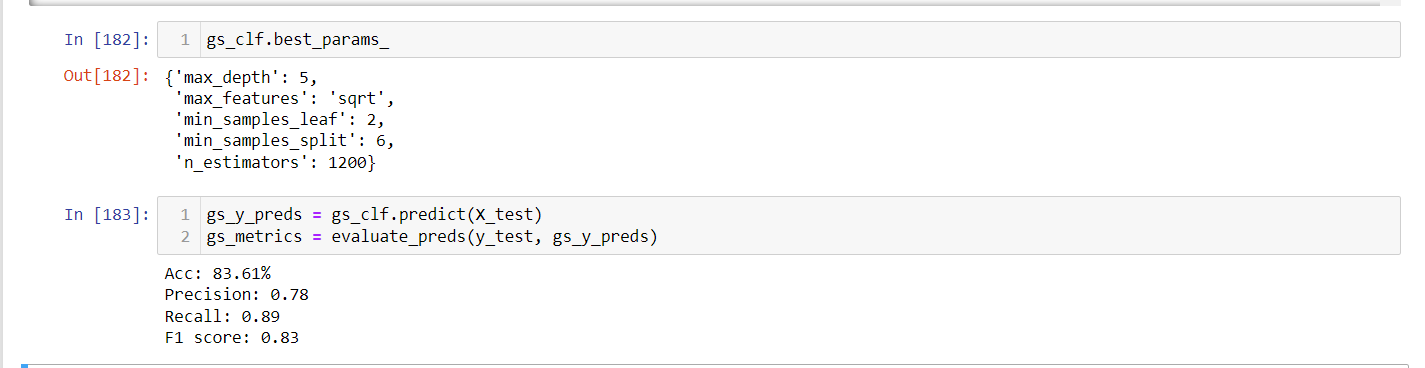

In [184]:
### Best parameters and thier results ###

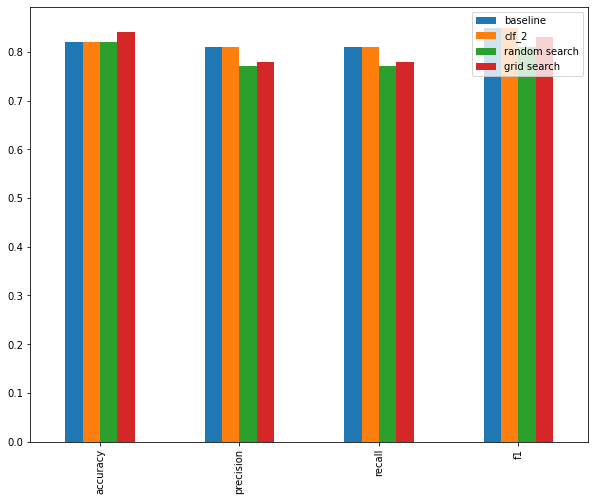

In [185]:
compare_metrics = pd.DataFrame({"baseline": baseline_metrics,
                                "clf_2": clf_2_metrics,
                                "random search": rs_metrics,
                                "grid search": gs_metrics})
compare_metrics.plot.bar(figsize=(10, 8));

In [186]:
# A good practice is to show how different models perform on different classification metrics

# NOTE: 
## The above models have been compared on different training data, use the same training data on each of the three models to check which gives the best output from the same training data
### Make sure to do forward/backward corelation as it is not necessary that each of the data column may not be useful for the analysis

# 6. Saving and loading trained machine learning models
Two ways:
1. Pythons 'pickle' module
2. 'joblib' module

**Pickle**

In [187]:
import pickle

# Save an existing model to file
pickle.dump(gs_clf, open("gs_random_forest_model_1.pkl", "wb"))

In [188]:
# Load a saved model
loaded_pickle_model = pickle.load(open("gs_random_forest_model_1.pkl", "rb"))

In [190]:
pickle_y_preds = loaded_pickle_model.predict(X_test)
evaluate_preds(y_test, pickle_y_preds)

Acc: 83.61%
Precision: 0.78
Recall: 0.89
F1 score: 0.83


{'accuracy': 0.84, 'precision': 0.78, 'recall': 0.78, 'f1': 0.83}

In [191]:
# Cool

**Joblib**

In [192]:
from joblib import dump, load
dump(gs_clf, filename="gs_random_forest_model_joblib_1.joblib")

['gs_random_forest_model_joblib_1.joblib']

In [195]:
loaded_job_model = load(filename="gs_random_forest_model_joblib_1.joblib")
joblib_y_preds = loaded_job_model.predict(X_test)
evaluate_preds(y_test, joblib_y_preds)

Acc: 83.61%
Precision: 0.78
Recall: 0.89
F1 score: 0.83


{'accuracy': 0.84, 'precision': 0.78, 'recall': 0.78, 'f1': 0.83}

In [196]:
# Sometimes with large models , joblib is preffered